###**Analisando e extraindo informações de arquivos com instâncias de Grafos**

---



In [59]:
# Função para ler as instâncias de arquivos de matrizes... # os dados no arquivo com dados deve estar separados por "," vírgula.
def ler_arquivo_instancia(arquivo):
  matriz = []
  with open(arquivo, "r") as arquivo:
    for linha in arquivo:
      # remove o caractere de quebra de linha do final da linha
      linha = linha.rstrip(", \n")
      linha = (linha.split(", "))
      i=0
      for elemento in linha:
        linha[i] = int(elemento)   # Modifique int para float para mudar o tipo de dado
        i+=1
      matriz.append(linha)
  return matriz

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Modifique aqui o aquivo da instância a ser lida**
Se for fazer upload comente o path e use somente " ". Se estiver no seu GDrive cole o caminho na string. 
Na tabela abaixo estão algumas informações sobre as instâncias para fazer os testes nos algorimtos.

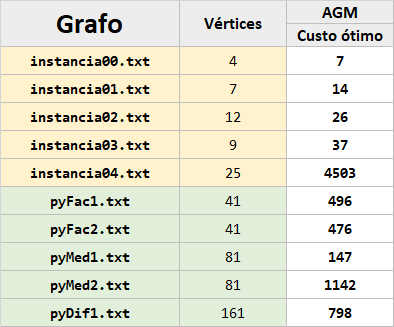

Link de acesso para os grafos de forma visual e testes na ferramenta Graph Online:
* instancia00.txt - https://graphonline.ru/pt/?graph=vvOsurssVcMLdaKdZZcst
* instancia01.txt - https://graphonline.ru/pt/?graph=REVGmSiDWzboNHUZ 
* instancia02.txt - http://graphonline.ru/pt/?graph=AJTGMrAnjRpsyZbPZZcst 
* instancia03.txt - http://graphonline.ru/pt/?graph=SSkKgEBxgvxKWVdnZZcst
* instancia04.txt - http://graphonline.ru/pt/?graph=quWFukwxhsMKkHPwZZcst 
* pyFac1.txt - http://graphonline.ru/pt/?graph=XriPTqhtwboVmNXG
* pyFac2.txt - http://graphonline.ru/pt/?graph=WHsiVjPArTvhoOHF 
* pyMed1.txt - http://graphonline.ru/pt/?graph=tvFwpngnwwcxVygw 
* pyMed2.txt - http://graphonline.ru/pt/?graph=LDuVhAziBpzZoFnJ
* pyDif1.txt - http://graphonline.ru/pt/?graph=siPmFKhSlCIeqyJz

Também é possível compreender o funcionamento desses algoritmos nessa ferramenta online: https://visualgo.net/en/mst?slide=1 



In [74]:
☻arquivo = "instancia01.txt"

path = "/content/drive/MyDrive/Colab Notebooks/inst"
#path = ""

# lendo arquivo da instancia em txt separado por vírgulas e armazenando 
grafo = ler_arquivo_instancia(f"{path}/{arquivo}")

In [76]:
#Mostrando os dados em forma de matriz extraidos do arquivo de texto.
print("Matriz de pesos:")
for matriz in grafo:
  print(matriz)

Matriz de pesos:
[0, 2, 0, 7, 0, 0, 2]
[2, 0, 1, 4, 3, 0, 5]
[0, 1, 0, 0, 4, 0, 4]
[7, 4, 0, 0, 1, 5, 0]
[0, 3, 4, 1, 0, 7, 0]
[0, 0, 0, 5, 7, 0, 0]
[2, 5, 4, 0, 0, 0, 0]


###Extraindo informações da Matriz

In [77]:
def mostra_dados(grafo):
  v = len(grafo)
  QA = 0
  CA = [] # Conjunto de arestas e pesos
  CV = [] # Conjunto de vértices
  for i in range(0, v):
    CV.append(i)
    for j in range(i+1, v):
      w = int(grafo[i][j])
      if (w != 0): #Se o peso for zero não tem aresta.
        QA+=1
        CA.append((i,j,w))
        print("Aresta:(", i ,"--", j ,") Peso:", w)
      #print(i, " - ",j)
  print("\nQuantidade de Vértices:",v)
  print("Conjunto de Vértices: ", CV)
  print("\nQuantidade de arestas:",QA)
  print("Conjunto de Arestas: (u, v, w): --",CA)  

#Executando a função definida acima.
mostra_dados(grafo)

Aresta:( 0 -- 1 ) Peso: 2
Aresta:( 0 -- 3 ) Peso: 7
Aresta:( 0 -- 6 ) Peso: 2
Aresta:( 1 -- 2 ) Peso: 1
Aresta:( 1 -- 3 ) Peso: 4
Aresta:( 1 -- 4 ) Peso: 3
Aresta:( 1 -- 6 ) Peso: 5
Aresta:( 2 -- 4 ) Peso: 4
Aresta:( 2 -- 6 ) Peso: 4
Aresta:( 3 -- 4 ) Peso: 1
Aresta:( 3 -- 5 ) Peso: 5
Aresta:( 4 -- 5 ) Peso: 7

Quantidade de Vértices: 7
Conjunto de Vértices:  [0, 1, 2, 3, 4, 5, 6]

Quantidade de arestas: 12
Conjunto de Arestas: (u, v, w): -- [(0, 1, 2), (0, 3, 7), (0, 6, 2), (1, 2, 1), (1, 3, 4), (1, 4, 3), (1, 6, 5), (2, 4, 4), (2, 6, 4), (3, 4, 1), (3, 5, 5), (4, 5, 7)]


#**Algoritmo de Kruskal**
O algoritmo de Kruskal é utilizado para encontrar a Árvore Geradora Mínima (AGM) em um grafo ponderado. Ele seleciona as arestas de menor peso, desde que não formem ciclos, para construir a AGM. Aqui está uma implementação em Python do algoritmo de Kruskal que recebe uma matriz de pesos como entrada e retorna uma lista com as arestas da AGM.

In [3]:
# Classe UnionFind para o algoritmo de Kruskal
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))  # Lista de pais
        self.rank = [0] * n  # Lista de classificações (ranks)
    
    def find(self, x):
        if self.parent[x] != x:  # Se o pai de x não for ele mesmo
            self.parent[x] = self.find(self.parent[x])  # Atualiza o pai de x recursivamente
        return self.parent[x]  # Retorna o pai de x
    
    def union(self, x, y):
        root_x = self.find(x)  # Encontra o pai de x
        root_y = self.find(y)  # Encontra o pai de y

        if self.rank[root_x] < self.rank[root_y]:  # Se o rank de x for menor do que o rank de y
            self.parent[root_x] = root_y  # Define o pai de x como o pai de y
        elif self.rank[root_x] > self.rank[root_y]:  # Se o rank de x for maior do que o rank de y
            self.parent[root_y] = root_x  # Define o pai de y como o pai de x
        else:  # Se os ranks de x e y forem iguais
            self.parent[root_y] = root_x  # Define o pai de y como o pai de x
            self.rank[root_x] += 1  # Incrementa o rank de x


# Função Kruskal para encontrar a Árvore Geradora Mínima (AGM)
def kruskal(weight_matrix):
    n = len(weight_matrix)
    edges = []  # Lista de arestas
    total_cost = 0  # Custo total da AGM

    # Constrói a lista de arestas
    for i in range(n):
        for j in range(i + 1, n):
            if weight_matrix[i][j] > 0:  # Se a aresta existe (peso > 0)
                edges.append((i, j, weight_matrix[i][j]))  # Adiciona a aresta à lista
    
    edges.sort(key=lambda x: x[2])  # Ordena as arestas por peso

    uf = UnionFind(n)  # Cria uma instância da classe UnionFind
    mst = []  # Lista de arestas da AGM

    # Itera sobre as arestas em ordem crescente de peso
    for edge in edges:
        u, v, weight = edge
        if uf.find(u) != uf.find(v):  # Verifica se a aresta forma um ciclo
            uf.union(u, v)  # Une os conjuntos representados pelos pais de u e v
            mst.append(edge)  # Adiciona a aresta à AGM
            total_cost += weight  # Incrementa o custo total da AGM
    
    return mst, total_cost  # Retorna a lista de arestas da AGM e o custo total

In [64]:
# Chamando a Função Kruskal que retornará a AGM e o Custo mínimo total
minimum_spanning_tree, cost = kruskal(grafo)
print("Árvore Geradora Mínima:")
for edge in minimum_spanning_tree:
    print(edge)

print("Custo da Árvore Geradora Mínima:", cost)

Árvore Geradora Mínima:
(1, 2, 1)
(3, 4, 1)
(0, 1, 2)
(0, 6, 2)
(1, 4, 3)
(3, 5, 5)
Custo da Árvore Geradora Mínima: 14


#**Algortítmo de Prim**
O algoritmo percorre os vértices selecionando sempre o de menor custo entre os não visitados, atualizando os custos e pais dos vértices adjacentes. No final, a lista de vértices da AGM é construída a partir das informações de pais, e o custo total da AGM é calculado somando os custos dos vértices.

In [69]:
# Função para o algoritmo de Prim
def prim(weight_matrix):
    n = len(weight_matrix)
    visited = [False] * n
    parent = [None] * n
    cost = [float('inf')] * n

    # Define o primeiro vértice como raiz da AGM
    parent[0] = -1
    cost[0] = 0

    for _ in range(n):
        # Encontra o vértice com menor custo que ainda não foi visitado
        min_cost = float('inf')
        u = -1

        for v in range(n):
            if not visited[v] and cost[v] < min_cost:
                min_cost = cost[v]
                u = v

        if u == -1:
            break

        visited[u] = True

        # Atualiza o custo e o pai dos vértices adjacentes não visitados
        for v in range(n):
            if (
                weight_matrix[u][v] > 0  # Se há uma aresta entre u e v
                and not visited[v]  # Se v ainda não foi visitado
                and weight_matrix[u][v] < cost[v]  # Se o custo da aresta é menor que o custo atual
            ):
                cost[v] = weight_matrix[u][v]
                parent[v] = u

    # Constrói a lista de vértices da AGM
    minimum_spanning_tree = []
    for v in range(1, n):
        minimum_spanning_tree.append((parent[v], v, cost[v]))

    return minimum_spanning_tree, sum(cost[1:])

In [71]:
# Execute aqui a função prim con o grafo em forma de matriz de pesos como parâmetro de entrada.
minimum_spanning_tree, total_cost = prim(grafo)

print("Árvore Geradora Mínima:")
for edge in minimum_spanning_tree:
    print(edge)

print("Custo da Árvore Geradora Mínima:", total_cost)

Árvore Geradora Mínima:
(0, 1, 2)
(1, 2, 1)
(4, 3, 1)
(1, 4, 3)
(3, 5, 5)
(0, 6, 2)
Custo da Árvore Geradora Mínima: 14
